Auto-detected table type: fits
Auto-detected table type: fits
Auto-detected table type: fits
44508746116725 
RA offset: -38.1, DEC offset: 114.52

44508746116744 
RA offset: -25.4, DEC offset: 202.68

44508746116533 
RA offset: -106.0, DEC offset: -194.58

44508746117301 
RA offset: 179.7, DEC offset: 162.24

44508746117457 
RA offset: 255.1, DEC offset: 106.23

44508746117491 
RA offset: 277.6, DEC offset: 16.07

44508746117492 
RA offset: 281.2, DEC offset: 13.65

44508746116935 
RA offset: 40.6, DEC offset: 284.79

44508746116218 
RA offset: -195.2, DEC offset: 219.19

44508746117451 
RA offset: 251.5, DEC offset: 160.71

Auto-detected table type: fits
44508746116800 
RA offset: 0.0, DEC offset: 0.00

44508746116914 
RA offset: 34.7, DEC offset: -26.66

44508746116777 
RA offset: -15.0, DEC offset: -43.80

44508746116989 
RA offset: 52.0, DEC offset: -56.49

44508746116661 
RA offset: -55.2, DEC offset: -53.45

44508746117032 
RA offset: 72.0, DEC offset: -31.02

44508746117087 
RA 

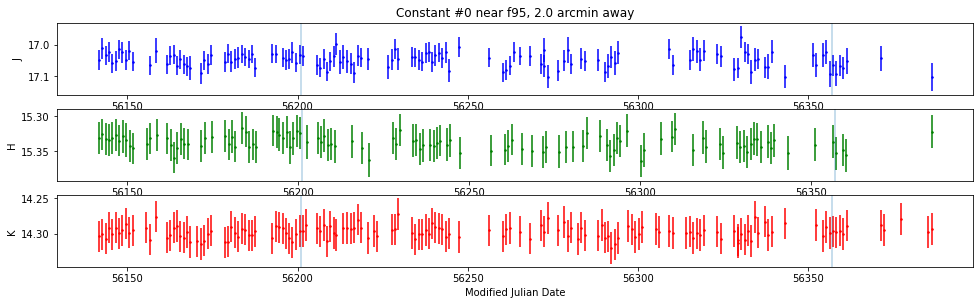

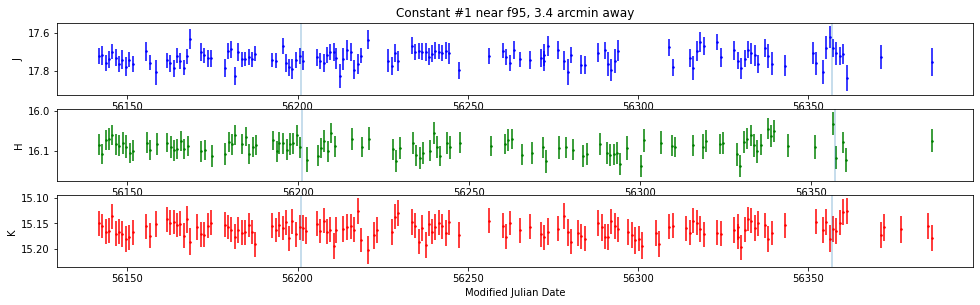

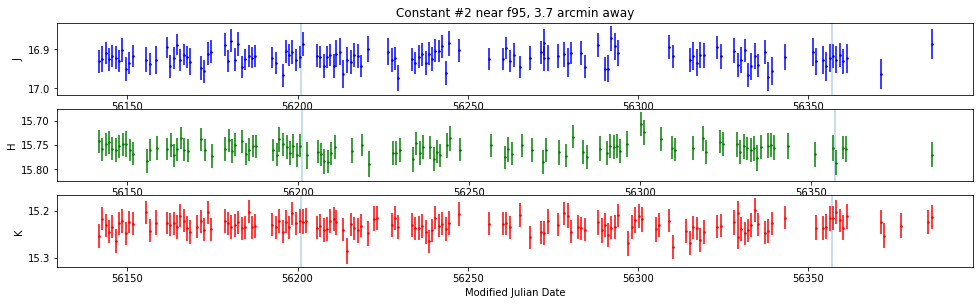

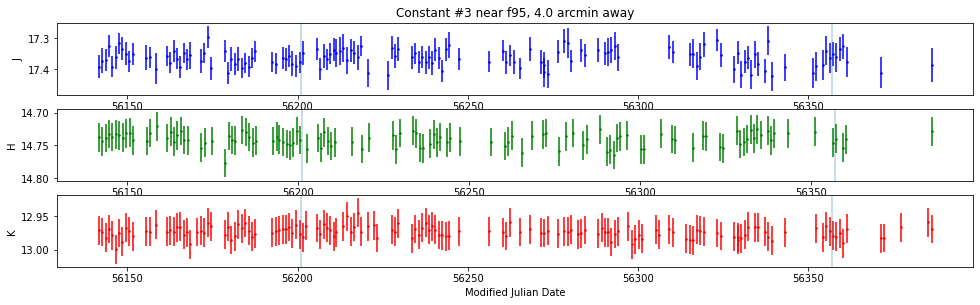

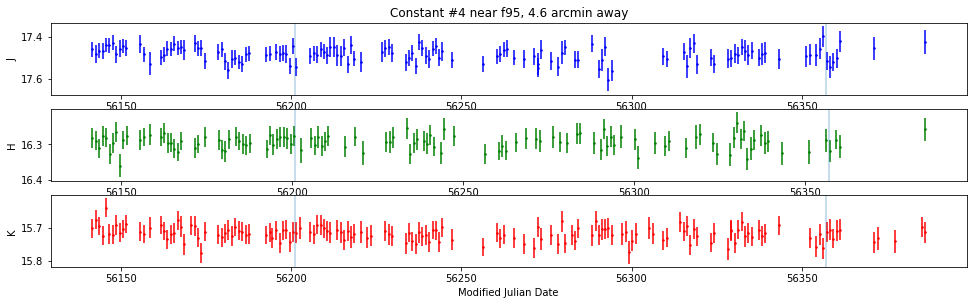

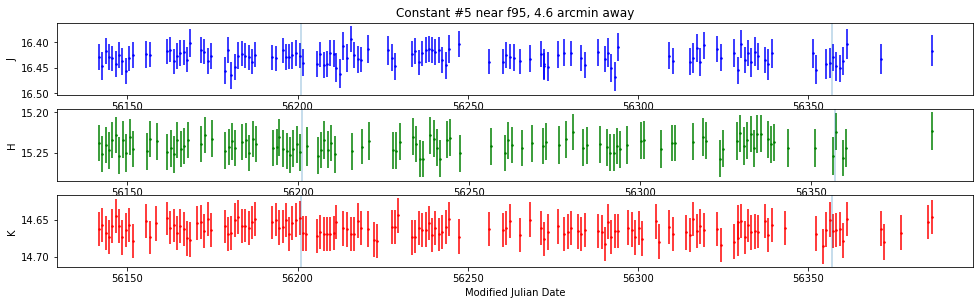

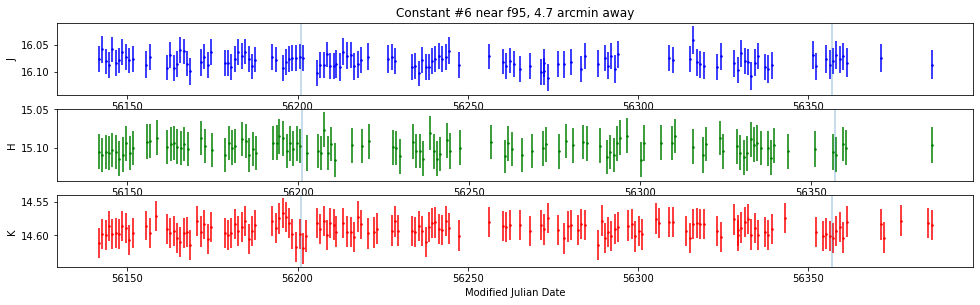

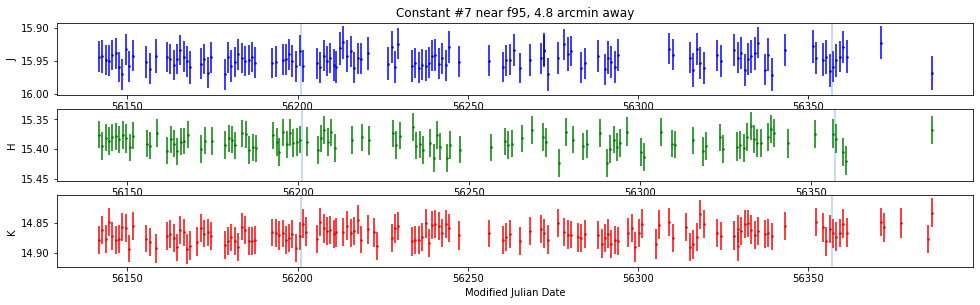

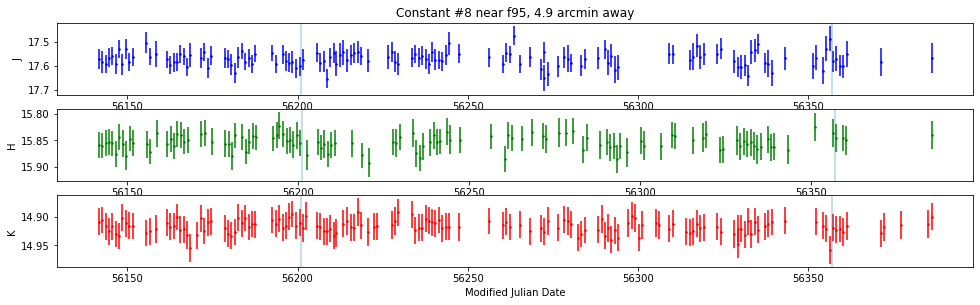

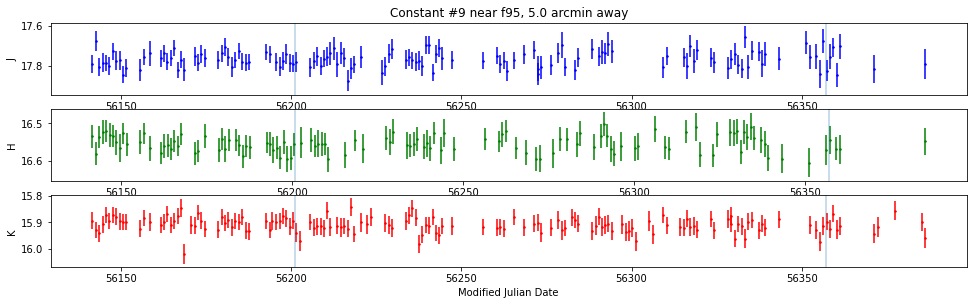

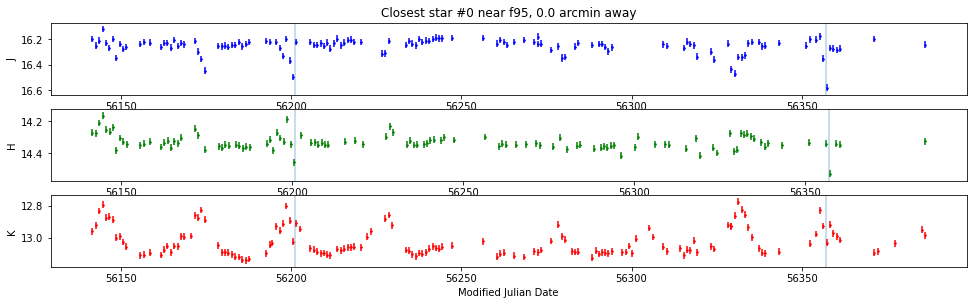

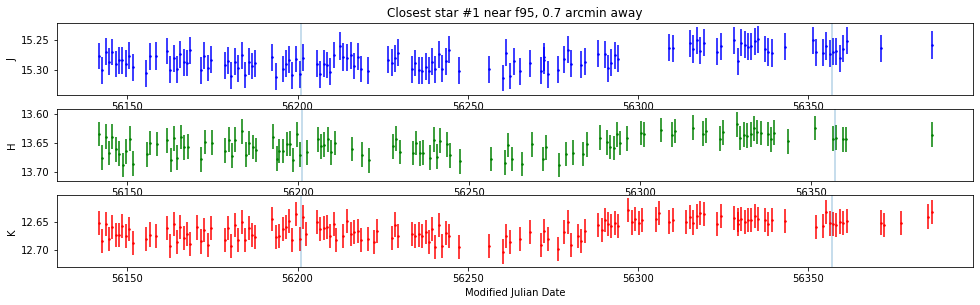

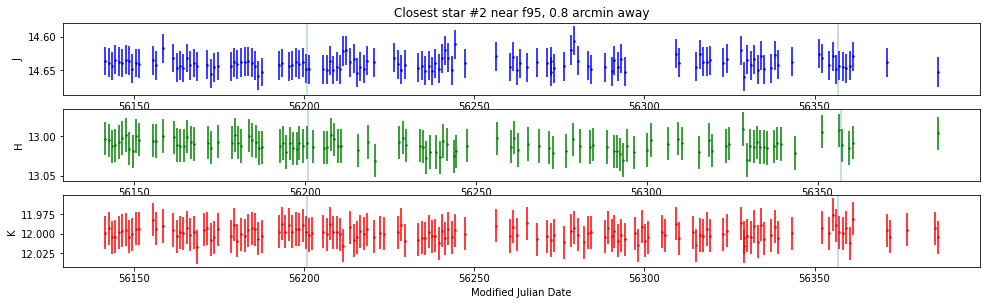

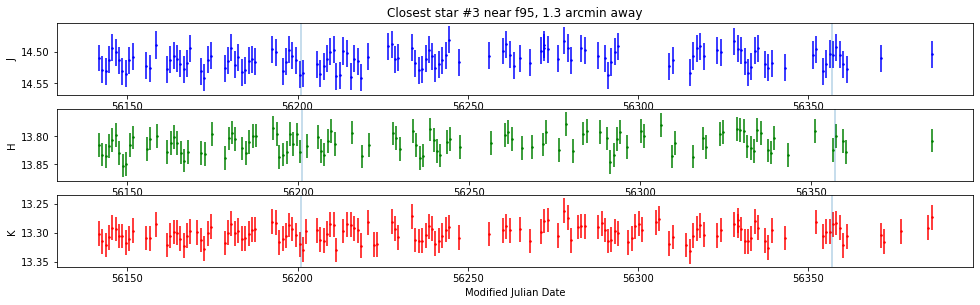

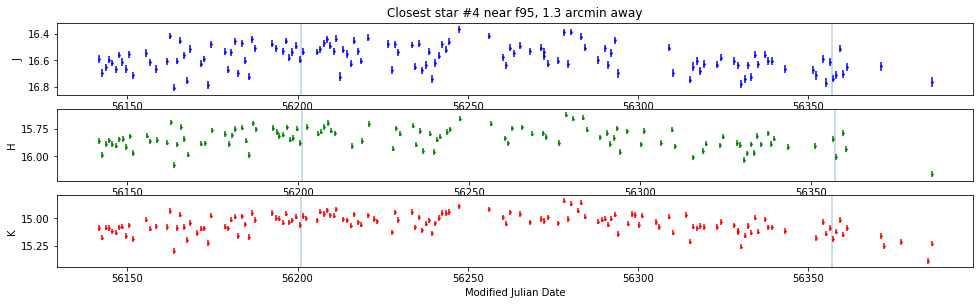

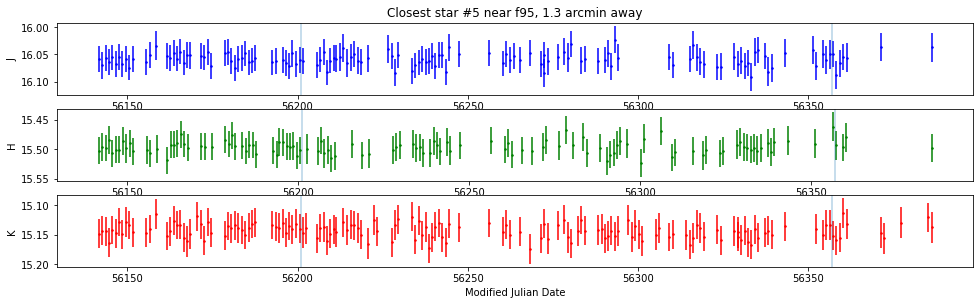

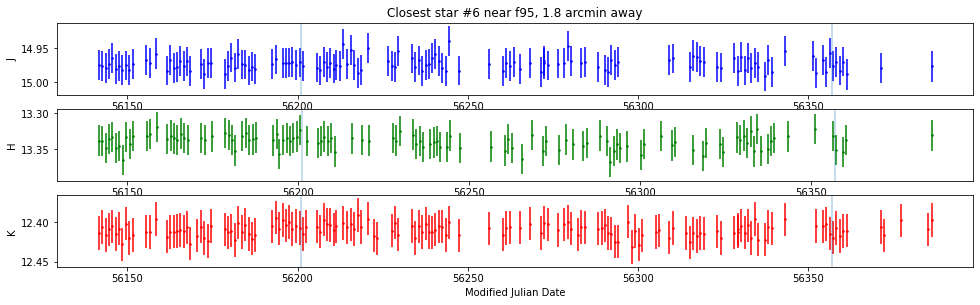

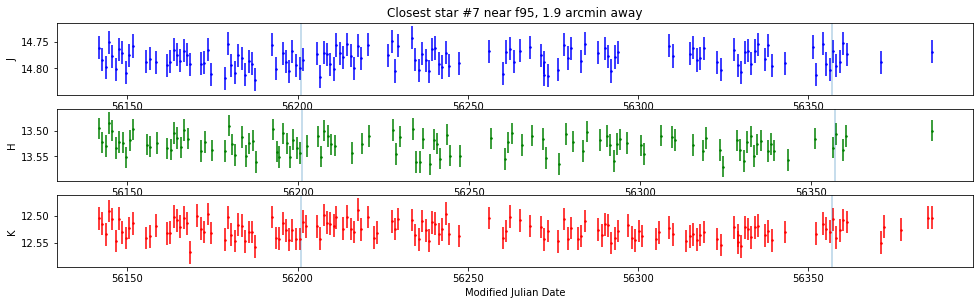

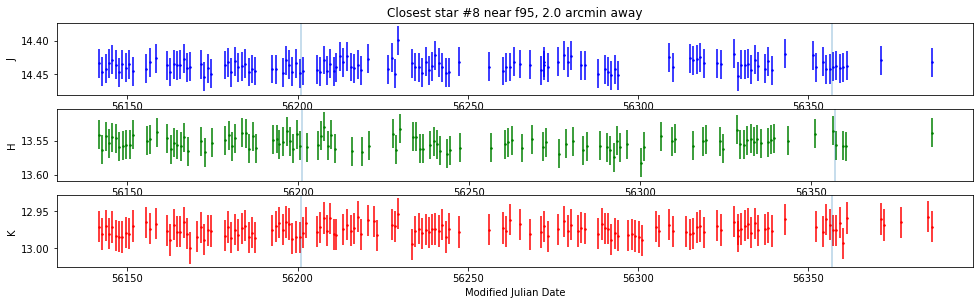

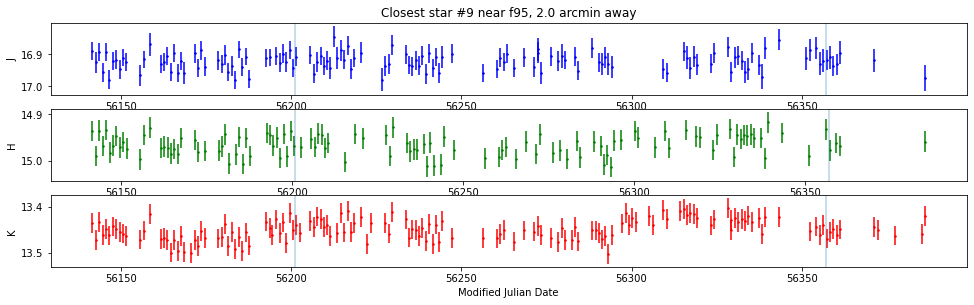

In [60]:
%run five_constant_lcs_near_f95.py

In [8]:
from plot_perseus import NGC1333StarData

import astropy.table
path = os.path.expanduser("~/Desktop/Bo_Tom/NGC1333/WSERV7/")
data_path = os.path.expanduser("~/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/")
full_cleaned_data = astropy.table.Table.read(data_path+"fdece_graded_clipped0.95_scrubbed0.1_dusted0.5.fits")
f95_stardata = NGC1333StarData(photometry_data, f95_id)


In [6]:
import atpy
constants = atpy.Table(path+'cleaning_products/constants_spreadsheet.fits')

Auto-detected table type: fits


In [7]:
constants

<Table name='SPREADSHEET' rows=1707 fields=153>

In [18]:
ra, dec = f95_stardata.s_table['RA'].mean(), f95_stardata.s_table['DEC'].mean()

In [27]:
distance = ((constants['RA'] - ra)**2 + (constants['DEC'] - dec)**2)**0.5
constants.add_column('distance_from_f95', distance)

In [28]:
constants.sort('distance_from_f95')

In [38]:
constants['SOURCEID'][:10]

array([44508746116725, 44508746116744, 44508746116533, 44508746117301,
       44508746117457, 44508746117491, 44508746117492, 44508746116935,
       44508746116218, 44508746117451])

In [33]:
ra, dec

(0.9126129389644096, 0.5471807876990845)

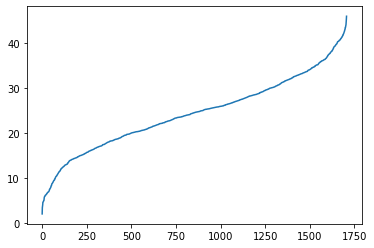

In [54]:
plt.plot(np.degrees(constants['distance_from_f95'])*60)

In [56]:
dropbox_bo_spread = dropbox_bo_data + "spreadsheet/"
spread = atpy.Table(
    dropbox_bo_spread + "fdece_graded_clipped0.95_scrubbed0.1_dusted0.5_spread.fits"
)
sp = spread

cand_case1 = (
    (sp.pstar_median > 0.75)
    & (
        (sp.N_j >= 50)
        & (sp.N_j <= 135)
        & (sp.j_mean > 11)  # J band criteria
        & (sp.j_mean < 17)
        & (sp.N_j_info == 0)
    )
    & (
        (sp.N_h >= 50)
        & (sp.N_h <= 130)
        & (sp.h_mean > 11)  # H band criteria
        & (sp.h_mean < 16.7)
        & (sp.N_h_info == 0)
    )
    & (
        (sp.N_k >= 50)
        & (sp.N_k <= 150)
        & (sp.k_mean > 11)  # K band criteria
        & (sp.k_mean < 16)
        & (sp.N_k_info == 0)
    )
)



Auto-detected table type: fits


In [57]:
cand_case1

array([False, False, False, ..., False, False, False])